In [ ]:
!pip install kagglehub
import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import tensorflow as tf
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.utils import img_to_array
from tensorflow.keras import Sequential, models, layers
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import optimizers

2025-10-08 16:55:32.269324: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1759942532.668821      37 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1759942532.788949      37 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [ ]:
path = f'{kagglehub.dataset_download("jonathanoheix/face-expression-recognition-dataset")}/images/'
train_dir = f"{path}train"
validation_dir = f"{path}validation"

In [ ]:
ds_train = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    image_size=(256, 256),
    batch_size=32,
    label_mode="int",
    shuffle=True,
    seed=42
)

Found 28821 files belonging to 7 classes.


I0000 00:00:1759942589.018812      37 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1759942589.019569      37 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


In [ ]:
ds_test = tf.keras.utils.image_dataset_from_directory(
    validation_dir,
    image_size=(256, 256),
    batch_size=32,
    label_mode="int",
    shuffle=False
)

Found 7066 files belonging to 7 classes.


In [ ]:
num_of_classes = len(ds_train.class_names)

In [ ]:
convolutional_base = ResNet50(weights='imagenet', include_top=False, input_shape=(256,256,3))
# convolutional_base.summary()

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
model = models.Sequential([
    convolutional_base,
    layers.Flatten(),
    layers.BatchNormalization(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.BatchNormalization(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.BatchNormalization(),
    layers.Dense(num_of_classes, activation='softmax')
])

In [ ]:
model.compile(optimizer=optimizers.Adam(learning_rate=1e-4), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(ds_train, validation_data=ds_test, epochs=10)

Epoch 1/10


I0000 00:00:1759942652.267927     112 service.cc:148] XLA service 0x7bfe84004ed0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1759942652.269283     112 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1759942652.269331     112 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1759942657.348809     112 cuda_dnn.cc:529] Loaded cuDNN version 90300
I0000 00:00:1759942682.553164     112 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


901/901 ━━━━━━━━━━━━━━━━━━━━ 440s 399ms/step - accuracy: 0.2928 - loss: 2.0324 - val_accuracy: 0.5446 - val_loss: 1.2759
Epoch 2/10
901/901 ━━━━━━━━━━━━━━━━━━━━ 331s 368ms/step - accuracy: 0.4782 - loss: 1.4437 - val_accuracy: 0.5892 - val_loss: 1.1399
Epoch 3/10
901/901 ━━━━━━━━━━━━━━━━━━━━ 329s 365ms/step - accuracy: 0.5491 - loss: 1.2549 - val_accuracy: 0.5961 - val_loss: 1.1311
Epoch 4/10
901/901 ━━━━━━━━━━━━━━━━━━━━ 331s 367ms/step - accuracy: 0.6015 - loss: 1.1278 - val_accuracy: 0.5681 - val_loss: 1.1783
Epoch 5/10
901/901 ━━━━━━━━━━━━━━━━━━━━ 331s 367ms/step - accuracy: 0.6482 - loss: 1.0037 - val_accuracy: 0.5425 - val_loss: 1.2195
Epoch 6/10
901/901 ━━━━━━━━━━━━━━━━━━━━ 331s 367ms/step - accuracy: 0.6856 - loss: 0.9177 - val_accuracy: 0.6129 - val_loss: 1.0566
Epoch 7/10
901/901 ━━━━━━━━━━━━━━━━━━━━ 330s 366ms/step - accuracy: 0.7271 - loss: 0.8072 - val_accuracy: 0.5920 - val_loss: 1.1521
Epoch 8/10
901/901 ━━━━━━━━━━━━━━━━━━━━ 328s 364ms/step - accuracy: 0.7705 - loss: 0.70

In [ ]:
model.save("/kaggle/working/face_emotion_detector.h5")
loss, accuracy = model.evaluate(ds_test)
print('Test Accuracy =', accuracy)

221/221 ━━━━━━━━━━━━━━━━━━━━ 22s 98ms/step - accuracy: 0.6267 - loss: 1.1498
Test Accuracy = 0.5925558805465698


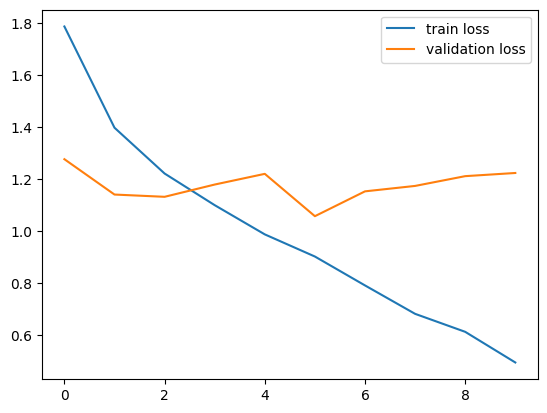

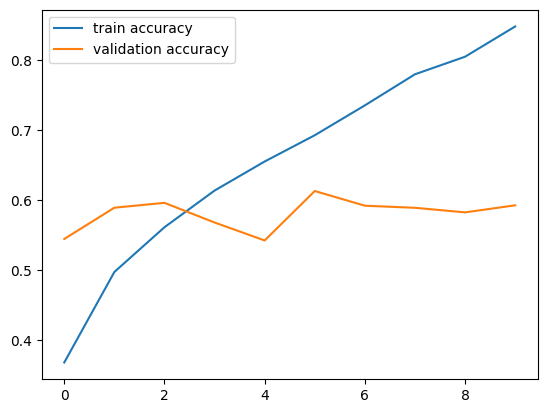

In [ ]:
h = history

plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

plt.plot(h.history['accuracy'], label='train accuracy')
plt.plot(h.history['val_accuracy'], label='validation accuracy')
plt.legend()
plt.show()